<h1>Relatório da Disciplina EEL891 - Introdução ao Aprendizado de Máquina</h1>
Aluno: João Felipe Guedes da Silva
Período: 2018.2

## 1. Imports

In [51]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carregando o dataset

In [270]:
dataset_dir = './Dataset/'
train_set = pd.read_csv(dataset_dir + 'train.csv')
test_set = pd.read_csv(dataset_dir + 'test.csv')

In [274]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 21 columns):
Id                4683 non-null int64
tipo              4683 non-null object
bairro            4683 non-null object
tipo_vendedor     4683 non-null object
quartos           4683 non-null int64
suites            4683 non-null int64
vagas             4683 non-null int64
area_util         4683 non-null int64
area_extra        4683 non-null int64
diferenciais      4683 non-null object
churrasqueira     4683 non-null int64
estacionamento    4683 non-null int64
piscina           4683 non-null int64
playground        4683 non-null int64
quadra            4683 non-null int64
s_festas          4683 non-null int64
s_jogos           4683 non-null int64
s_ginastica       4683 non-null int64
sauna             4683 non-null int64
vista_mar         4683 non-null int64
preco             4683 non-null float64
dtypes: float64(1), int64(16), object(4)
memory usage: 768.4+ KB


In [275]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
Id                2000 non-null int64
tipo              2000 non-null object
bairro            2000 non-null object
tipo_vendedor     2000 non-null object
quartos           2000 non-null int64
suites            2000 non-null int64
vagas             2000 non-null int64
area_util         2000 non-null int64
area_extra        2000 non-null int64
diferenciais      2000 non-null object
churrasqueira     2000 non-null int64
estacionamento    2000 non-null int64
piscina           2000 non-null int64
playground        2000 non-null int64
quadra            2000 non-null int64
s_festas          2000 non-null int64
s_jogos           2000 non-null int64
s_ginastica       2000 non-null int64
sauna             2000 non-null int64
vista_mar         2000 non-null int64
dtypes: int64(16), object(4)
memory usage: 312.6+ KB


## 3. Pre-processamento

O dataset não possui valores faltantes e, portanto, tal etapa não será realizada. 

Ao todo, o dataset possui 21 variáveis, das quais podem ser separadas em:
- 4 Variáveis de entrada categóricas: tipo, bairro, tipo_vendedor, diferenciais
- 5 Variáveis de entrada numéricas não-binárias: quartos, suites, vagas, area_util, area_extra
- 10 Variáveis de entrada numéricas binárias: churrasqueira, estacionamento, piscina, playground, quadra, s_festas, s_jogos, s_ginastica, sauna, vista_mar
- 1 Variável de saída numérica: preco

A variável **Id** não possui valor quantitativo para o problema por se tratar de um identificador e, portanto, será removido do conjunto. 

O pré-processamento de cada um dos conjuntos de variáveis será realizado separadamente.


In [276]:
train_set.drop(columns=['Id'], axis=1, inplace=True)
test_set.drop(columns=['Id'], axis=1, inplace=True)

### 3.1 Transformação de variável categórica em numérica

#### 3.1.1 Tipo
Como a quantidade de ocorrências dos tipos Apartamento e Casa são muito maiores do que Quitinete e Loft, esta variável será transformada em uma variável binária onde **1** é o tipo apartamento e **0** é o tipo não-apartamento (Casa, Quitinete ou Loft)

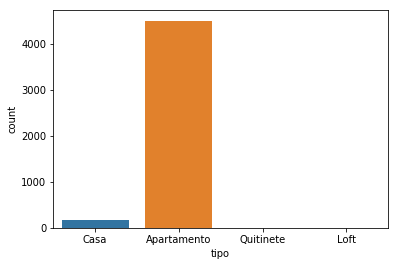

In [277]:
sns.countplot(x='tipo', data=train_set);
#plt.xticks(rotation=45);

In [278]:
replace_dict = {'Casa':0, 'Quitinete':0, 'Loft':0, 'Apartamento': 1}

train_set['tipo'] = train_set['tipo'].replace(replace_dict)
test_set['tipo'] = test_set['tipo'].replace(replace_dict)

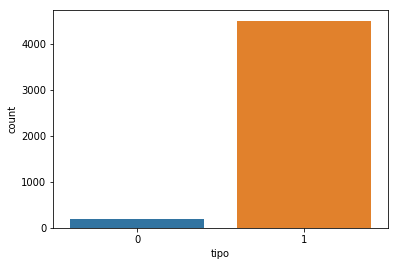

In [279]:
sns.countplot(x='tipo', data=train_set);

#### 3.1.2 Bairro

Pela do bairro, podemos ver que temos 66 bairros diferentes sendo que o bairro mais frequente é Boa Viagem (1599 ocorrências). Como esta variável deve ser binarizada, ela sozinha geraria 66 variáveis a mais para o modelo, todas informando apenas qual bairro o imóvel se encontra. 

Para reduzir o número de variáveis, traçaremos um threshold definindo os bairros que não possuem quantidade expressiva de ocorrências. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text xticklabel objects>)

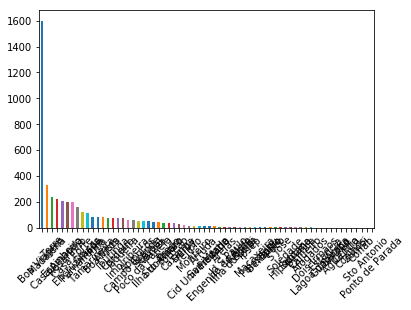

In [280]:
train_set['bairro'].value_counts().plot(kind="bar")
plt.xticks(rotation=45)

In [281]:
train_set = pd.concat([train_set, pd.get_dummies(train_set['bairro'], prefix='bairro')], axis=1)
train_set.drop(['bairro'], axis = 1, inplace = True)
test_set = pd.concat([test_set, pd.get_dummies(test_set['bairro'], prefix='bairro')], axis=1)
test_set.drop(['bairro'], axis = 1, inplace = True)

#### 3.1.3 Tipo Vendedor
Como só há 2 tipos de vendedores (Imobiliária e Pessoa Física), categorizaremos essa variável da seguinte forma: 
- 0: Imobiliária
- 1: Pessoa Física

(array([0, 1]), <a list of 2 Text xticklabel objects>)

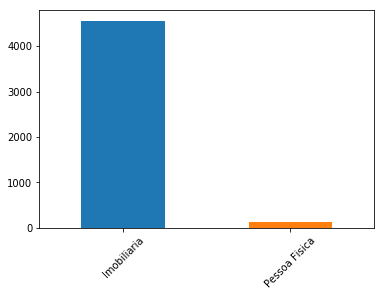

In [282]:
train_set['tipo_vendedor'].value_counts().plot(kind="bar")
plt.xticks(rotation=45)

In [283]:
replace_dict = {'Imobiliaria':0, 'Pessoa Fisica': 1}

train_set['tipo_vendedor'] = train_set['tipo_vendedor'].replace(replace_dict)
test_set['tipo_vendedor'] = test_set['tipo_vendedor'].replace(replace_dict)

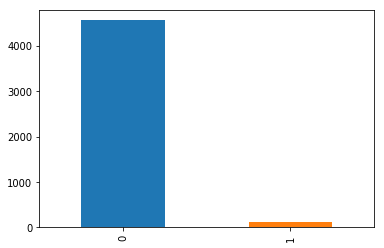

In [284]:
train_set['tipo_vendedor'].value_counts().plot(kind="bar")

#### 3.1.4 Diferenciais
O campo diferenciais possui itens separados por **e**. Assim, separaremos esses itens em colunas indicando quais itens o imóvel tem. Note que, se o item já estiver na lista de itens binarizados, ou seja, os que já vieram como variáveis numéricas binárias, este item não será um diferencial extra pois esta informação já está contida no dataset

In [285]:
itens_binarizados = ['churrasqueira', 'estacionamento', 'piscina', 
             'playground', 'quadra', 's_festas', 
             's_jogos', 's_ginastica', 'sauna', 'vista_mar']

In [286]:
separador_diferenciais = lambda x: pd.Series([str(i).lower() for i in reversed(x.split(' e '))])
diferenciais = train_set['diferenciais'].apply(separador_diferenciais)

In [287]:
diferenciais_unicos = np.array([])
for dif_index in diferenciais.columns:
    diferenciais_unicos = np.append(diferenciais_unicos, diferenciais[dif_index].unique(), axis = 0)        
diferenciais_unicos = np.array(['nenhum' if x is np.nan else x for x in diferenciais_unicos])
diferenciais_unicos = np.unique(diferenciais_unicos)

In [288]:
for diferencial in diferenciais_unicos:
    if diferencial not in itens_binarizados:
        train_set['dif_' + str(diferencial)] = train_set['diferenciais'].apply(lambda x: 1 if diferencial in x else 0)
        test_set['dif_' + str(diferencial)] = test_set['diferenciais'].apply(lambda x: 1 if diferencial in x else 0)
train_set.drop(['diferenciais'], axis = 1, inplace = True)
test_set.drop(['diferenciais'], axis = 1, inplace = True)

### 3.2 Transformação Variáveis Numéricas Não-Binárias

quartos, suites, vagas, area_util, area_extra

In [289]:
numerical_colnames = ['quartos', 'suites', 'vagas', 'area_util', 'area_extra']
train_set[numerical_colnames].describe()

,quartos,suites,vagas,area_util,area_extra
count,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000
mean,3.043562,1.434337,1.708093,124.158018,13.293188
std,0.873590,1.102457,1.210975,107.365110,266.803756
min,1.000000,0.000000,0.000000,21.000000,0.000000
25%,3.000000,1.000000,1.000000,68.000000,0.000000
50%,3.000000,1.000000,2.000000,96.000000,0.000000
75%,4.000000,2.000000,2.000000,149.000000,0.000000
max,9.000000,6.000000,30.000000,2045.000000,17450.000000


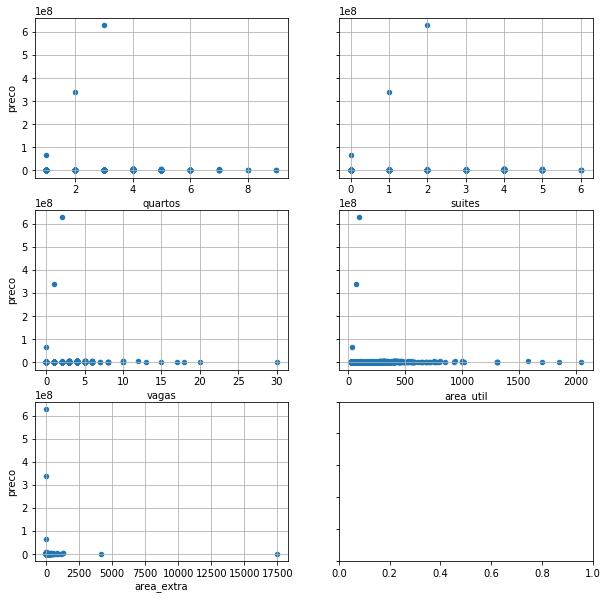

In [290]:
data = pd.concat([train_set['preco'], train_set[numerical_colnames]], axis=1)
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i in range(len(numerical_colnames)):
    data.plot.scatter(x = numerical_colnames[i], y = 'preco', ax = axes[i//2, i%2], 
                      sharey = True, grid = True)

#### 3.2.1 Quartos

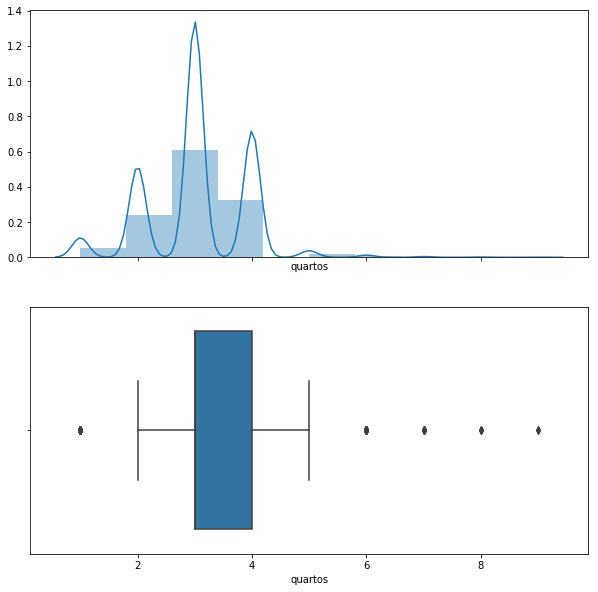

In [291]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['quartos'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['quartos'], ax = axes[1])

In [292]:
quartos_thr = 6
train_set = train_set[train_set['quartos'] < quartos_thr]
test_set = test_set[test_set['quartos'] < quartos_thr]

#### 3.2.2 Suites

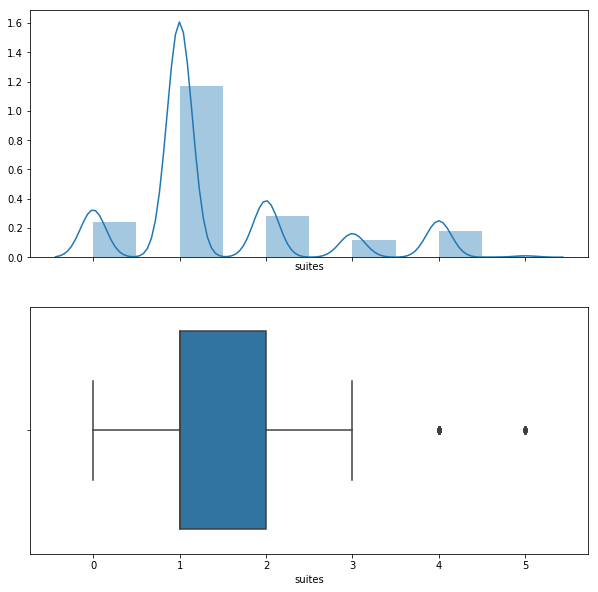

In [293]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['suites'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['suites'], ax = axes[1])

In [294]:
suites_thr = 4
train_set = train_set[train_set['suites'] < suites_thr]
test_set = test_set[test_set['suites'] < suites_thr]

#### 3.2.3 Vagas

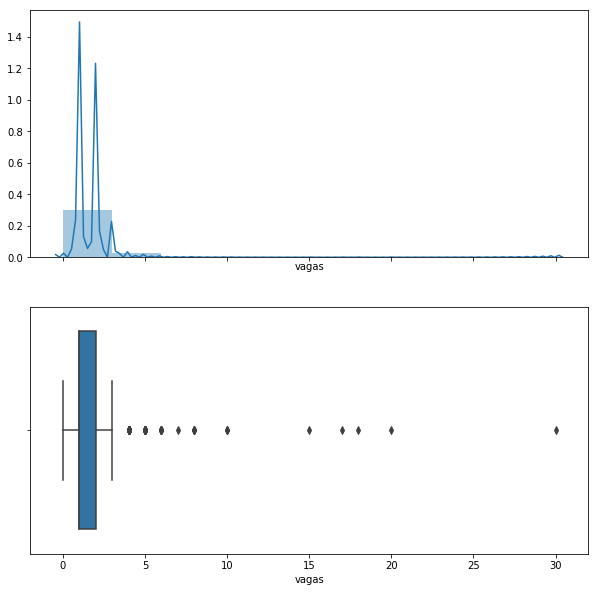

In [295]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['vagas'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['vagas'], ax = axes[1])

In [296]:
vagas_thr = 11
train_set = train_set[train_set['vagas'] < vagas_thr]
test_set = test_set[test_set['vagas'] < vagas_thr]

#### 3.2.4 Area Util

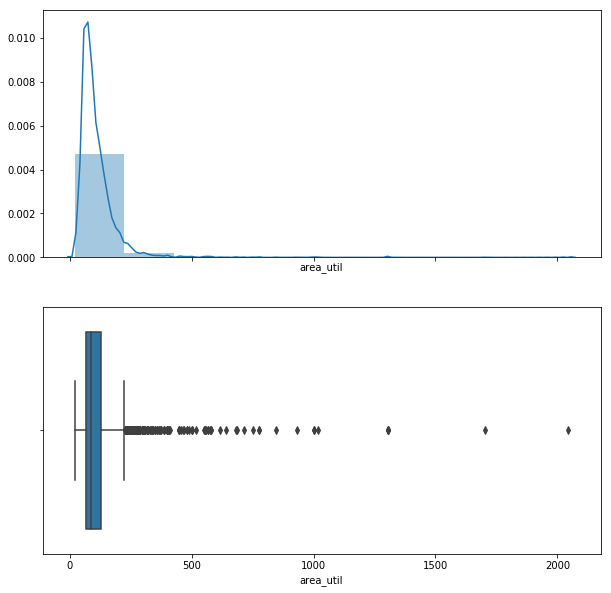

In [297]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.distplot(train_set['area_util'], bins = 10, ax = axes[0])
sns.boxplot(x = train_set['area_util'], ax = axes[1])

### 3.3 Transformação Variáveis Numéricas Binárias